In [21]:
import numpy as np
import pandas as pd

from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.neuralforecast import NeuralForecastRNN, NeuralForecastLSTM
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

In [22]:
m2 = web.DataReader(name='WM2NS', data_source='fred', start='1995-01-01')
y = np.log(m2) #лог доходность #dropna сбрасывает нулевые значения чтобы было без ошибок

<Axes: xlabel='DATE'>

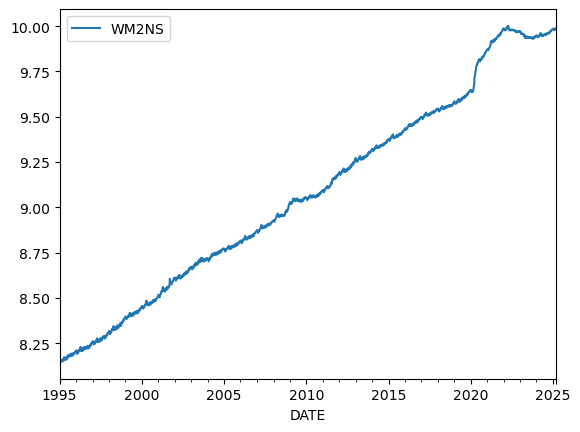

In [23]:
y.plot()

In [24]:
forecaster = AutoARIMA(information_criterion='bic', test='kpss', seasonal=False)
forecaster.fit(y)
forecaster.get_fitted_params() #['order']

{'intercept': 0.003584598465323833,
 'ar.L1': -0.5415609916342747,
 'ar.L2': -0.7826462060566242,
 'ar.L3': -0.7735125809629044,
 'ma.L1': 0.5145394272476185,
 'ma.L2': 0.9459056549086672,
 'ma.L3': 0.6059334706950275,
 'ma.L4': 0.23084347569974611,
 'sigma2': 1.6199129886206105e-05,
 'order': (3, 1, 4),
 'seasonal_order': (0, 0, 0, 0),
 'aic': -12871.684921948054,
 'aicc': -12871.569832433986,
 'bic': -12823.432543087258,
 'hqic': -12853.752479652125}

In [25]:
y_train, y_test = temporal_train_test_split(y, test_size=20)

In [26]:
forecaster = ARIMA(order=(3,1,4), trend='c')
y_pred_arima = forecaster.fit_predict(y_train, fh=y_test.index)

In [27]:
model_rnn = NeuralForecastRNN("W-Mon", max_steps=10)

y_pred_rnn = model_rnn.fit_predict(y_train, fh=y_test.index)

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 40.2 K | train
5 | mlp_decoder     | MLP           | 2.4 K  | train
----------------------------------------------------------
163 K     Trainable params
0         Non-trainable params
163 K     Total params
0.654     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

In [28]:
model_lstm = NeuralForecastLSTM("W-Mon", max_steps=10)

y_pred_lstm = model_lstm.fit_predict(y_train, fh=y_test.index)

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 484 K  | train
4 | context_adapter | Linear        | 40.2 K | train
5 | mlp_decoder     | MLP           | 2.4 K  | train
----------------------------------------------------------
526 K     Trainable params
0         Non-trainable params
526 K     Total params
2.106     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

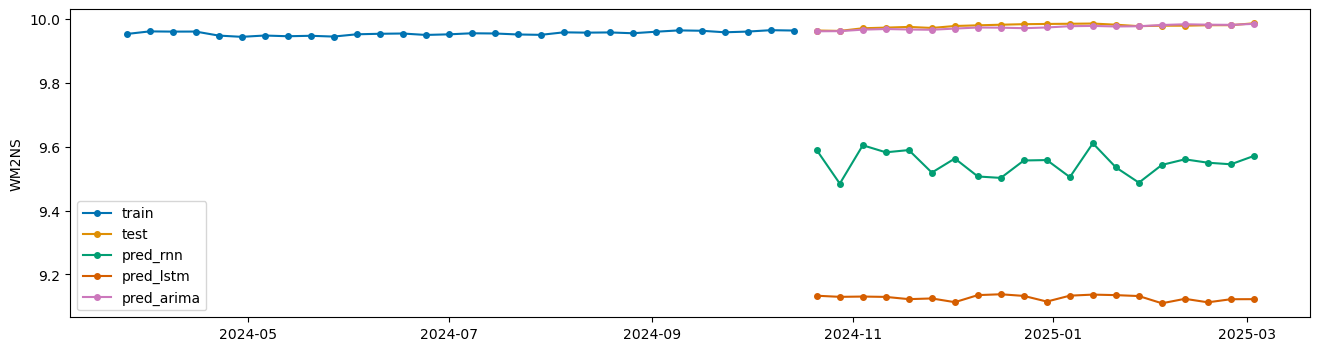

In [29]:
plot_series(y_train.tail(30), y_test, y_pred_rnn, y_pred_lstm, y_pred_arima, labels=['train', 'test', 'pred_rnn', 'pred_lstm', 'pred_arima'])

plt.show()